In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [4]:
#@title Read data. Clean a bit.
file1 = open('CCRB_database_raw.csv', 'r') 
df = pd.read_csv(file1)
df = df.drop(['ShieldNo', 'AsOfDate'], axis=1)
# Fix up some common typos in the dataset.
allegations_correction_dict = {
    'Vehicle Searched': 'Vehicle search',
    'Other - Ethnic Slur': 'Ethnic Slur',
    'Refusal to provide shield number': 'Refusal to provide name/shield number',
    'Refusal to provide name': 'Refusal to provide name/shield number',
    'Property Damaged': 'Property damaged',
    'Gun Pointed': 'Gun pointed/gun drawn',
    'Gun pointed': 'Gun pointed/gun drawn',
    'Threat of Arrest': 'Threat of arrest',
    'Other- Discourtesy': 'Discourtesy',
    'Premise Searched': 'Premises entered and/or searched',
    'Entry of Premises': 'Premises entered and/or searched',
    'Search of Premises': 'Premises entered and/or searched',
    'Threat of Summons': 'Threat of summons',
    'Property Damaged': 'Property damaged',
    'Flashlight As Club': 'Flashlight As club',
    'Radio As Club': 'Radio as club',
    'Gun Fired': 'Gun fired',
    'Gun As Club': 'Gun As club',
}

penalty_correction_dict = {
    'Terminated': 'Termination',
}

df['Allegation'] = df['Allegation'].replace(allegations_correction_dict)
df['PenaltyDesc'] = df['PenaltyDesc'].replace(penalty_correction_dict)
df['Full Name'] = df['First Name'] + " " + df['Last Name']

df['Incident Date'] = pd.to_datetime(df['Incident Date'], format='%m/%d/%Y')
dates = df["Incident Date"]

df['day'] = df['Incident Date'].dt.day
df['month'] = df['Incident Date'].dt.month
df['year'] = df['Incident Date'].dt.year

df = df.drop(['Incident Date'], axis=1)

In [93]:
import datetime as dt
df['days since epoch'] = (dates - dt.datetime(1970,1,1)).dt.days
df['months since epoch'] = df['days since epoch']//30
df['weeks since epoch'] = df['days since epoch']//7

In [6]:
temp = df['Command'].str.split(' ',n = 1, expand = True)
df['Command_1'] = temp[0]
df['Command_2'] = temp[1]

In [7]:
df['NYPDDisposition'].unique()

array([nan, 'Instructions', 'Command Discipline - A', 'APU Not guilty',
       'APU Closed: Retired', 'APU Guilty', 'No Disciplinary Action-DUP',
       'Command Discipline - B', 'Formalized Training',
       'Not Guilty - DCT', 'Charge Dismissed - DCT', 'Guilty - DCT',
       'APU Closed: Other', 'No Disciplinary Action-SOL',
       'APU - Decision Pending', 'Plead Guilty - OATH', 'APU Dismissed',
       'Plead Guilty - DCT', 'APU Retained, with discipline',
       'Charge Dismissed - OATH', 'APU Closed: Dismissed by APU',
       'Command Level Instructions',
       'APU Closed: Retained, with discipline', 'No Finding', 'Filed',
       'APU Formalized Training', 'APU Closed: SOL Expired prior to APU',
       'Negttn-Nolo contendre', 'Negttn-Guilty',
       'APU Closed: Previously adjudicated, with discipline',
       'APU Closed: Retained, without discipline',
       'APU Closed: Previously adjudicated, without discipline',
       'APU Nolo contendere', 'Not Guilty - OATH',
       'AP

In [8]:
df['Board Disposition'].unique()

array(['Unsubstantiated', 'Complainant Unavailable', 'Unfounded',
       'Exonerated', nan, 'Alleged Victim Unavailable',
       'Complainant Uncooperative',
       'Substantiated (Command Lvl Instructions)',
       'Substantiated (Formalized Training)', 'Complaint Withdrawn',
       'Miscellaneous - Subject Retired', 'Alleged Victim Uncooperative',
       'Substantiated (Charges)', 'Substantiated (Command Discipline)',
       'Victim Unidentified', 'Substantiated (Command Discipline B)',
       'Substantiated (Command Discipline A)', 'Miscellaneous',
       'Substantiated (No Recommendations)',
       'Closed - Pending Litigation', 'Substantiated (Instructions)',
       'Miscellaneous - Subject Resigned',
       'Miscellaneous - Subject Terminated', 'Officer(s) Unidentified',
       'Witness Uncooperative', 'Substantiated (MOS Unidentified)',
       'Witness Unavailable'], dtype=object)

In [9]:
df.sample(15)

,Unique Id,First Name,Last Name,Rank,Command,Complaint Id,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc,Full Name,day,month,year,days since epoch,months since epoch,Command_1,Command_2
93976,74854,Kenneth,Farrell,POM,TB DT01,NaN,NaN,NaN,NaN,NaN,NaN,Kenneth Farrell,NaN,NaN,NaN,NaN,NaN,TB,DT01
235722,37765,Donald,Player,SDS,DB BSHM,9000272.0,Discourtesy,Curse,Unsubstantiated,NaN,NaN,Donald Player,13.0,1.0,1990.0,7317.0,243.0,DB,BSHM
221308,80906,Eric,Ortiz,DT3,WARRSEC,200814809.0,Abuse of Authority,Search (of person),Unsubstantiated,NaN,NaN,Eric Ortiz,1.0,10.0,2008.0,14153.0,471.0,WARRSEC,None
197321,40719,Marytheres,Milillo,POF,DIS CTL,8901966.0,Force,Other - Force,Unsubstantiated,NaN,NaN,Marytheres Milillo,24.0,3.0,1989.0,7022.0,234.0,DIS,CTL
265658,20243,Angel,Sanchez,DT1,081 DET,9903555.0,Abuse of Authority,Threat of arrest,Substantiated (Command Discipline),NaN,NaN,Angel Sanchez,5.0,8.0,1999.0,10808.0,360.0,081,DET
190568,10681,Lance,Mclaughlin,DT3,047 DET,8801051.0,Abuse of Authority,Gun Drawn,Unsubstantiated,NaN,NaN,Lance Mclaughlin,27.0,3.0,1988.0,6660.0,222.0,047,DET
186377,60781,Edward,Mcclain,POM,PBBX,201806754.0,Discourtesy,Word,Unsubstantiated,NaN,NaN,Edward Mcclain,11.0,8.0,2018.0,17754.0,591.0,PBBX,None
67292,26681,Daniel,Daddino,POM,109 PCT,NaN,NaN,NaN,NaN,NaN,NaN,Daniel Daddino,NaN,NaN,NaN,NaN,NaN,109,PCT
313886,13522,John,West,POM,060 PCT,9003154.0,Discourtesy,Nasty Words,Complainant Uncooperative,NaN,NaN,John West,26.0,10.0,1990.0,7603.0,253.0,060,PCT
243518,80029,Adrian,Ramos,DT3,VED ZN1,201405318.0,Abuse of Authority,Strip-searched,Complainant Uncooperative,NaN,NaN,Adrian Ramos,28.0,5.0,2014.0,16218.0,540.0,VED,ZN1


In [98]:
col_names = list(df.columns)
col_names

['Unique Id',
 'First Name',
 'Last Name',
 'Rank',
 'Command',
 'Complaint Id',
 'FADO Type',
 'Allegation',
 'Board Disposition',
 'NYPDDisposition',
 'PenaltyDesc',
 'Full Name',
 'day',
 'month',
 'year',
 'days since epoch',
 'months since epoch',
 'Command_1',
 'Command_2',
 'weeks since epoch']

In [175]:
temp = df[['Complaint Id','day', 'month', 'year','Command_1', 'Command_2']]
df[['Complaint Id', 'day', 'month', 'year','Command_1', 'Command_2']] = df[['Complaint Id','day', 'month', 'year','Command_1', 'Command_2']].fillna(value=0)
df = df.astype(str)
df.fillna('', inplace=True)
df.sample(15)

,Unique Id,First Name,Last Name,Rank,Command,Complaint Id,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc,Full Name,day,month,year,days since epoch,months since epoch,Command_1,Command_2,weeks since epoch
257310,44254,Andrew,Romano,POM,H BX/Q,9904368.0,Discourtesy,Curse,Complainant Uncooperative,nan,nan,Andrew Romano,24.0,9.0,1999.0,10858.0,361.0,H,BX/Q,1551.142857142857
2306,80104,Anthony,Adorno,SGT,VICE ED,9904738.0,Abuse of Authority,Vehicle search,Substantiated (Charges),nan,nan,Anthony Adorno,20.0,10.0,1999.0,10884.0,362.0,VICE,ED,1554.857142857143
23083,39143,Gerard,Bishop,LT,DB MSVS,8507275.0,Force,Push/Shove,Unsubstantiated,nan,nan,Gerard Bishop,20.0,12.0,1985.0,5832.0,194.0,DB,MSVS,833.1428571428571
271269,32680,Andrew,Schmitt,POM,BKLN CT,200402270.0,Force,Physical force,Unsubstantiated,nan,nan,Andrew Schmitt,5.0,3.0,2004.0,12482.0,416.0,BKLN,CT,1783.142857142857
88808,13130,Mitchell,Eisenberg,DT2,060 DET,200610717.0,Force,Other,Exonerated,nan,nan,Mitchell Eisenberg,11.0,8.0,2006.0,13371.0,445.0,060,DET,1910.142857142857
100754,56466,Donald,Flynn,SDS,ND Q/NI,8406461.0,Abuse of Authority,Abuse of Authority,Unsubstantiated,nan,nan,Donald Flynn,0.0,0.0,0.0,nan,nan,ND,Q/NI,nan
99310,7146,Lamik,Fitzgerald,POM,040 PCT,0.0,nan,nan,nan,nan,nan,Lamik Fitzgerald,0.0,0.0,0.0,nan,nan,040,PCT,nan
27729,41896,Kevin,Boyle,DTS,ESS 09,9703376.0,Force,Gun pointed/gun drawn,Exonerated,nan,nan,Kevin Boyle,26.0,7.0,1997.0,10068.0,335.0,ESS,09,1438.2857142857142
85238,48930,Jonathan,Dubroff,DT1,INT OAS,200008062.0,Force,Physical force,Complaint Withdrawn,nan,nan,Jonathan Dubroff,4.0,11.0,2000.0,11265.0,375.0,INT,OAS,1609.2857142857142
261285,36127,Ian,Rule,LT,CRM CTL,200615524.0,Abuse of Authority,Question and/or stop,Exonerated,nan,nan,Ian Rule,10.0,11.0,2006.0,13462.0,448.0,CRM,CTL,1923.142857142857


Text(0.5, 1.0, 'Correlation between different fearures')

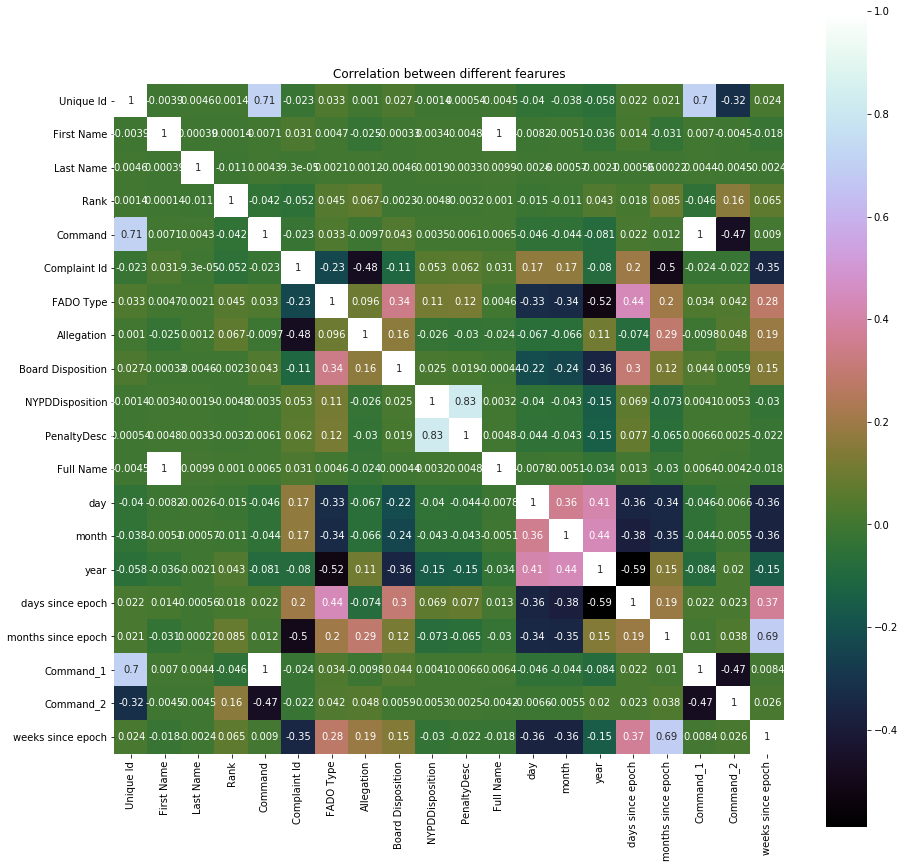

In [100]:
from sklearn.preprocessing import OrdinalEncoder
def encode(df):
    enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value =np.nan)
    enc.fit(df)
    df_num = pd.DataFrame(data = enc.transform(df), columns = col_names)
    return df_num

df_num = encode(df)
correlation = df_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')


# Year -- Complaint ID && UniqueID -- Command


# Stronger positive correlation:
# NYPD disposition -- Command ID
# Penalty disc --  NYPD disposition
# Board disposition -- NYPD disposition
# Complaint ID -- Board disposition
# Board disposition -- Year 


#Strong negative correlatioin;
# year --  NYPD disposition 
# Complaint ID -- NYPD disposition

#Complaint ID -- NYPD disposition -- Board disposition triangle


In [13]:
enc.categories_

NameError: name 'enc' is not defined

In [16]:
len(df_num['Complaint Id'].unique())
df_num["Board Disposition"]=df_num["Board Disposition"].astype('int32')


/Users/pennyliu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


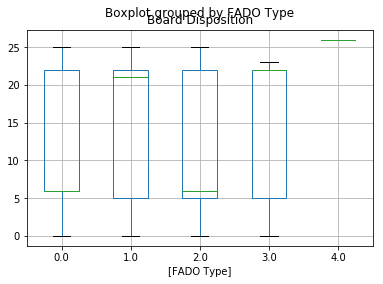

In [17]:
complaint_id_df = pd.DataFrame(df_num,  columns = ["Board Disposition", "FADO Type"])
#complaint_id_df.plot.scatter(x='Board Disposition', y='NYPDDisposition', c='DarkBlue')
complaint_id_df.boxplot(by='FADO Type')

#        'Substantiated (Command Lvl Instructions)',
#        'Substantiated (Formalized Training)',
#        'Substantiated (Instructions)',

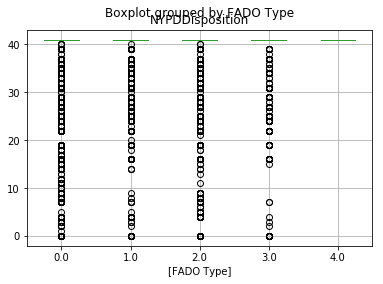

In [18]:
complaint_id_df = pd.DataFrame(df_num,  columns = ["NYPDDisposition", "FADO Type"])
#complaint_id_df.plot.scatter(x='Board Disposition', y='NYPDDisposition', c='DarkBlue')
complaint_id_df.boxplot(by='FADO Type')


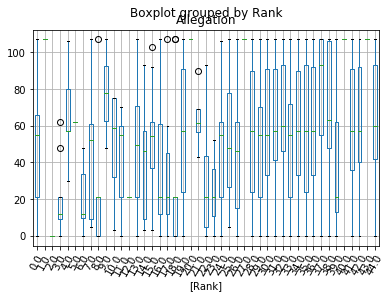

In [19]:
complaint_id_df = pd.DataFrame(df_num,  columns = ["Rank", "Allegation"])
#complaint_id_df.plot.scatter(x='Board Disposition', y='NYPDDisposition', c='DarkBlue')
complaint_id_df.boxplot(by='Rank', rot = 60)


In [20]:
ax = df.groupby(['FADO Type','PenaltyDesc', 'year'])['Unique Id'].count().reset_index(name='count')
ax.style.background_gradient(cmap="CMRmap_r")

,FADO Type,PenaltyDesc,year,count
0,Abuse of Authority,APU - Decision Pending,2012.0,3
1,Abuse of Authority,APU - Decision Pending,2014.0,1
2,Abuse of Authority,APU - Decision Pending,2015.0,4
3,Abuse of Authority,APU - Decision Pending,2016.0,1
4,Abuse of Authority,APU - Decision Pending,2017.0,51
5,Abuse of Authority,APU - Decision Pending,2018.0,71
6,Abuse of Authority,APU - Decision Pending,2019.0,35
7,Abuse of Authority,Charges Dismissed - DCT,2001.0,5
8,Abuse of Authority,Charges Dismissed - DCT,2002.0,34
9,Abuse of Authority,Charges Dismissed - DCT,2003.0,55


# Principal Component Analysis

In [234]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
file2= open('capstat_expanded_dataset.csv', 'r')
df2 = pd.read_csv(file2)
x_std = StandardScaler().fit_transform(df_num)


In [220]:
n_components = np.arange(1, 3, 1)
def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores
compute_scores(x_std)

([-28.00195526311672, -27.41378936803529],
 [-28.054238905106224, -24.552340276987714])

([<matplotlib.axis.XTick at 0x7fdef9f26be0>,
 <a list of 18 Text xticklabel objects>)

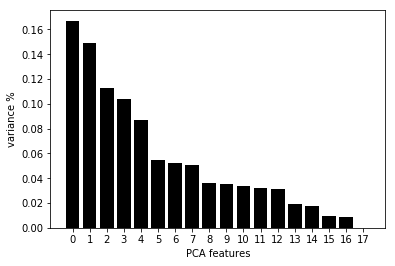

In [22]:
pca = PCA(n_components=18, svd_solver='full')
principalComponents = pca.fit_transform(x_std)
pca_components = pd.DataFrame(principalComponents)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 3')

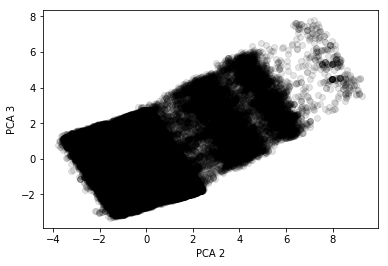

In [23]:
plt.scatter(pca_components[2], pca_components[3], alpha=.1, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

Text(0, 0.5, 'PCA 4')

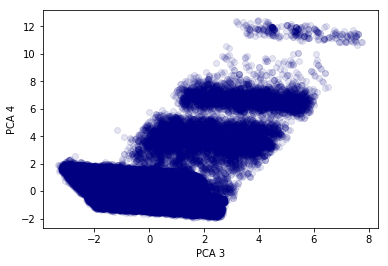

In [24]:
plt.scatter(pca_components[3], pca_components[4], alpha=.1, color='navy')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')

In [25]:
# pca_2 = KernelPCA(n_components=6, kernel='poly')
# principalComponents_2 = pca_2.fit_transform(x_std)
# pca_components_2 = pd.DataFrame(principalComponents_2)

# features_2 = range(pca_2.n_components_)
# plt.bar(features_2, pca_2.explained_variance_ratio_, color='black')
# plt.xlabel('Kernel PCA features')
# plt.ylabel('variance %')
# plt.xticks(features_2)


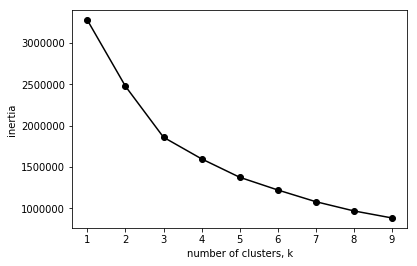

In [26]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [237]:
pca.noise_variance_

0.0011105153765140249

# Graph Analysis

In [27]:
import graspologic
from graspologic.simulations import sbm, rdpg
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.inference import latent_position_test

# n_components = 4 # the number of embedding dimensions for ASE

# df_graph = df_num[['FADO Type','Allegation','Board Disposition', 'NYPDDisposition', 'PenaltyDesc', 'days since epoch', 'Command_1','Command_2']].values
# A = rdpg(df_graph)
# # csize = [32] * 4
# A = sbm(csize, df_graph)
# X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
# heatmap(A, title='4-block SBM adjacency matrix')
# _ = pairplot(X, title='4-block adjacency spectral embedding')


In [28]:
df_num_pct = encode(df[df['Command_2'] == 'PCT'])

In [223]:
df_graph = df_num_pct[['FADO Type','Allegation','Board Disposition','NYPDDisposition', 'PenaltyDesc', 'months since epoch', 'Command_1','Rank', 'Unique Id']]
complaints_per_month = df_graph.groupby(["months since epoch"]).agg({'Command_1':'nunique', 'Allegation': 'nunique', 'NYPDDisposition':'nunique', 'PenaltyDesc': 'nunique', 'Board Disposition': 'nunique', 'Rank': 'nunique', 'Unique Id': 'nunique'}).reset_index('months since epoch')
col_names = complaints_per_month.columns
df_graph= df_graph.sort_values(by=['months since epoch'])

In [236]:
complaints_per_month = pd.DataFrame(data = StandardScaler().fit_transform(complaints_per_month), columns = col_names)

In [225]:
# from sklearn.cluster import SpectralClustering
#df_graph=df_graph.sample(200)
# clustering = SpectralClustering(n_clusters=4,  assign_labels="kmeans",  random_state=0, eigen_tol=0).fit(df_num_pct)

In [226]:
# clustering.labels_

In [33]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=4, metric="dtw",
                         max_iter=1, random_state=0)
tskm = model.fit(complaints_per_month.iloc[:, 1:5])

In [34]:
tskm.labels_

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pennyliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pennyliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


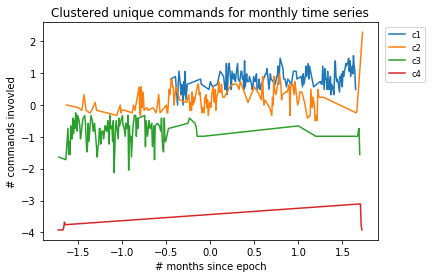

In [227]:
# 'Command_1', 'Allegation', 'NYPDDisposition', 'PenaltyDesc', 'Board Disposition'
fig = plt.figure()
ax = plt.axes()

plt.xlabel('# months since epoch') 
plt.ylabel('# commands invovled') 

plt.title("Clustered unique commands for monthly time series")

label0 = complaints_per_month[tskm.labels_ == 0]
label1 = complaints_per_month[tskm.labels_ == 1]
label2 = complaints_per_month[tskm.labels_ == 2]
label3 = complaints_per_month[tskm.labels_ == 3]

plt.plot(label0.iloc[:, 0], label0.iloc[:, 1], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 1], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 1], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 1], label='c4')

lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)

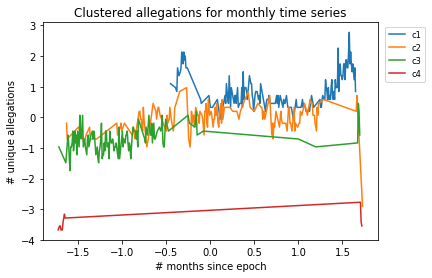

In [228]:
plt.xlabel('# months since epoch') 
plt.ylabel('# unique allegations') 

plt.title("Clustered allegations for monthly time series")

plt.plot(label0.iloc[:, 0], label0.iloc[:, 2], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 2], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 2], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 2], label='c4')


lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)

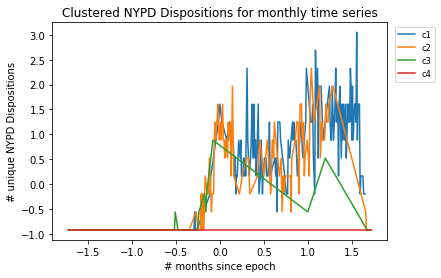

In [229]:
plt.xlabel('# months since epoch') 
plt.ylabel('# unique NYPD Dispositions') 

plt.title("Clustered NYPD Dispositions for monthly time series")

plt.plot(label0.iloc[:, 0], label0.iloc[:, 3], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 3], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 3], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 3], label='c4')

lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)

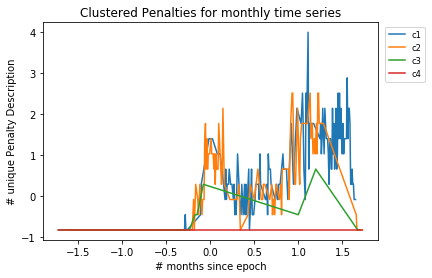

In [230]:
plt.xlabel('# months since epoch') 
plt.ylabel('# unique Penalty Description') 

plt.title("Clustered Penalties for monthly time series")
plt.plot(label0.iloc[:, 0], label0.iloc[:, 4], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 4], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 4], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 4], label='c4')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)

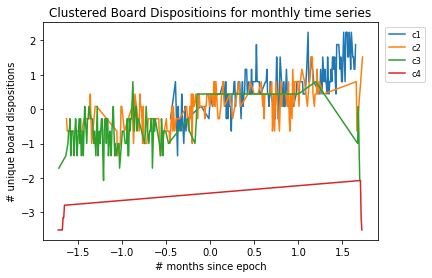

In [231]:
plt.xlabel('# months since epoch') 
plt.ylabel('# unique board dispositions') 

plt.title("Clustered Board Dispositioins for monthly time series")

plt.plot(label0.iloc[:, 0], label0.iloc[:, 5], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 5], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 5], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 5], label='c4')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)


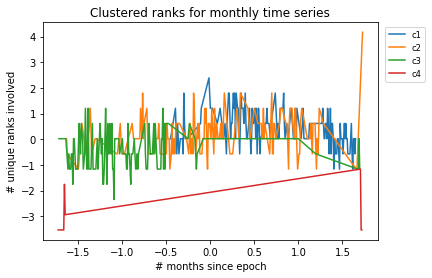

In [232]:
plt.xlabel('# months since epoch') 
plt.ylabel('# unique ranks involved') 

plt.title("Clustered ranks for monthly time series")

plt.plot(label0.iloc[:, 0], label0.iloc[:, 6], label='c1')
plt.plot(label1.iloc[:, 0], label1.iloc[:, 6], label='c2')
plt.plot(label2.iloc[:, 0], label2.iloc[:, 6], label='c3')
plt.plot(label3.iloc[:, 0], label3.iloc[:, 6], label='c4')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', fancybox=True)

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


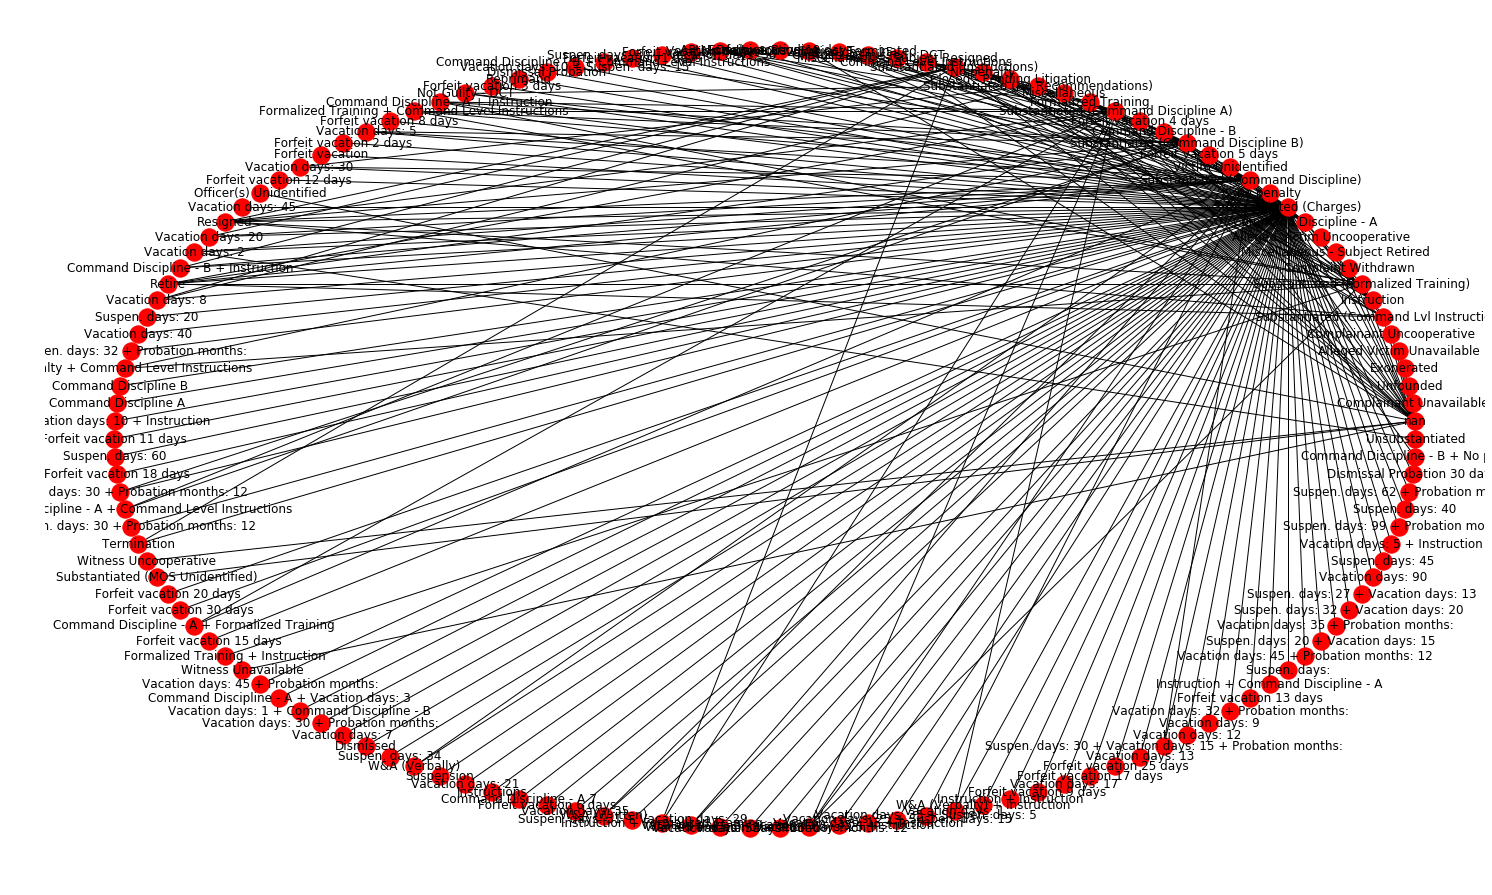

In [131]:
from matplotlib.pyplot import figure
import networkx as nx

figure(figsize=(20, 12))
G = nx.Graph()
G = nx.from_pandas_edgelist(df[df['Command_2'] == 'PCT'], 'Board Disposition', 'PenaltyDesc')
nx.draw_shell(G, with_labels=True)


In [49]:
df_graph = df_num[['FADO Type','Allegation','Board Disposition', 'NYPDDisposition', 'PenaltyDesc', 'days since epoch', 'Command_1','Command_2', 'Unique Id']]
months_of_complaints = df.groupby(["month"]).size().reset_index(name="Number of Complaints per Month").sort_values(by=['month'], ascending = True)

# Time Series Analysis

In [52]:
import statsmodels.api  as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf



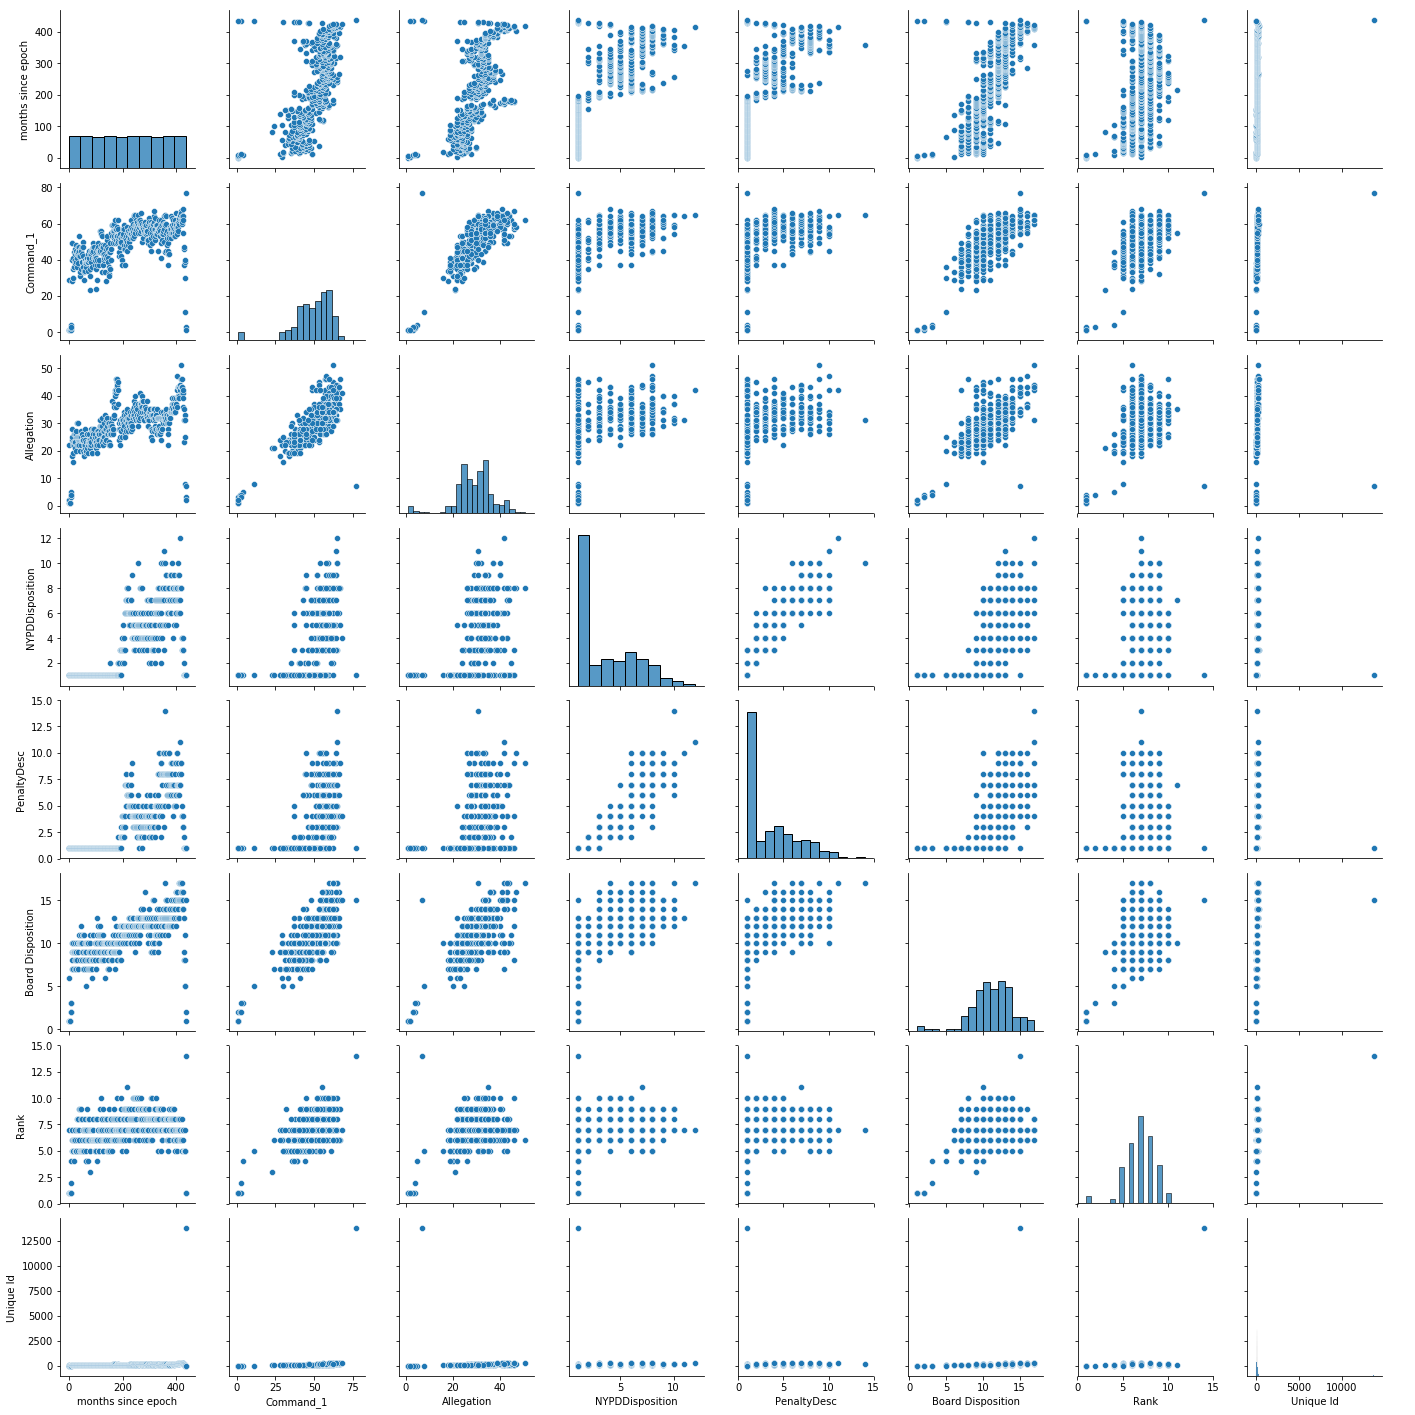

In [52]:
sns.pairplot(complaints_per_month)

In [148]:
df_graph = df_num[['FADO Type','Allegation','Board Disposition','NYPDDisposition', 'PenaltyDesc', 'months since epoch', 'weeks since epoch', 'Command','Rank', 'Unique Id']]
df_month = df_graph.groupby(["months since epoch"]).agg({'Command':'nunique', 'Allegation': 'sum', 'NYPDDisposition':'sum', 'PenaltyDesc': 'sum', 'Board Disposition': 'sum', 'Rank': 'nunique', 'Unique Id': 'nunique'}).reset_index('months since epoch')
df_week = df_graph.groupby(["weeks since epoch"]).agg({'Command':'nunique', 'Allegation': 'sum', 'NYPDDisposition':'sum', 'PenaltyDesc': 'sum', 'Board Disposition': 'sum', 'Rank': 'nunique', 'Unique Id': 'nunique'}).reset_index('weeks since epoch')


In [ ]:
IsolationForest



In [171]:
df_week = df_week.fillna(value=0)



In [211]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

reg = linear_model.LinearRegression(normalize=True)
X = df_month.iloc[:, 1: 7]
y = df_month.iloc[:, 7]
reg.fit(X, y)
y_pred = reg.predict(X)
print('r2_score: %.3f'
      % r2_score(y[2:], y_pred[:-2]))


r2_score: -0.015


In [210]:
poly = PolynomialFeatures(degree=1)
X = df_month.iloc[:, 1: 7]
y = df_month.iloc[:, 7]
X = poly.fit_transform(df_month.iloc[:, 1: 7])
reg_en.fit(X, y)

y_pred = reg_en.predict(X)
print('r2_score: %.8f'
      % r2_score(y[1:], y_pred[:-1]))


r2_score: -0.00100468


In [194]:
# from sklearn.svm import SVR
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#                coef0=1)
# X = df_week.iloc[:, 1: 6]
# y = df_week.iloc[:, 7]

# svr_poly.fit(X, y)
# y_pred = svr_poly.predict(X)
# print('r2_score: %.2f'
#       % r2_score(y[2:], y_pred[:-2]))

In [208]:
reg_en = linear_model.ElasticNet(normalize=True)
X = df_month.iloc[:, 1: 7]
y = df_month.iloc[:, 7]
reg_en.fit(X, y)
y_pred = reg_en.predict(X)
print('r2_score: %.8f'
      % r2_score(y[1:], y_pred[:-1]))


r2_score: -0.00100468


In [207]:
reg_br = linear_model.BayesianRidge()
X = df_month.iloc[:, 1: 7]
y = df_month.iloc[:, 7]
reg_br.fit(X, y)
y_pred = reg_br.predict(X)
print('r2_score: %.5f'
      % r2_score(y[1:], y_pred[:-1]))


r2_score: -0.01423


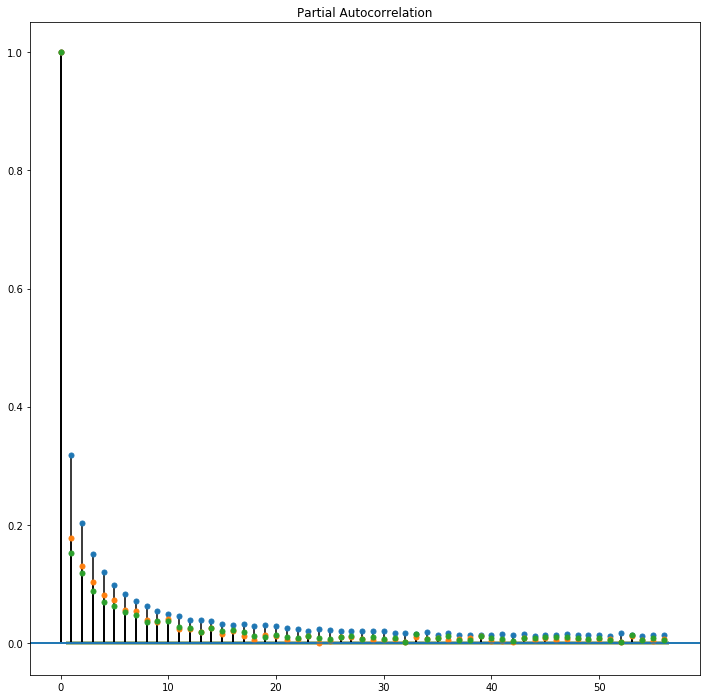

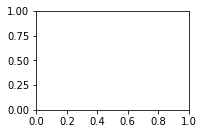

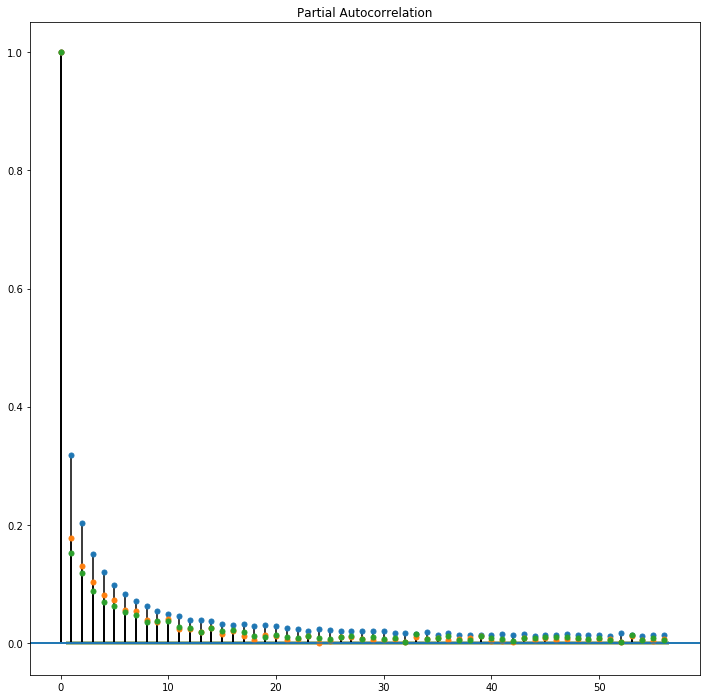

In [53]:
df_sorted = df_num.sort_values(by='days since epoch')
ax = plt.subplot(2, 2, 1)
fig, ax1 = plt.subplots(figsize=(12, 12))
plot_pacf(df_sorted['Board Disposition'], ax=ax1)
plot_pacf(df_sorted['NYPDDisposition'], ax=ax1)
plot_pacf(df_sorted['PenaltyDesc'], ax=ax1)


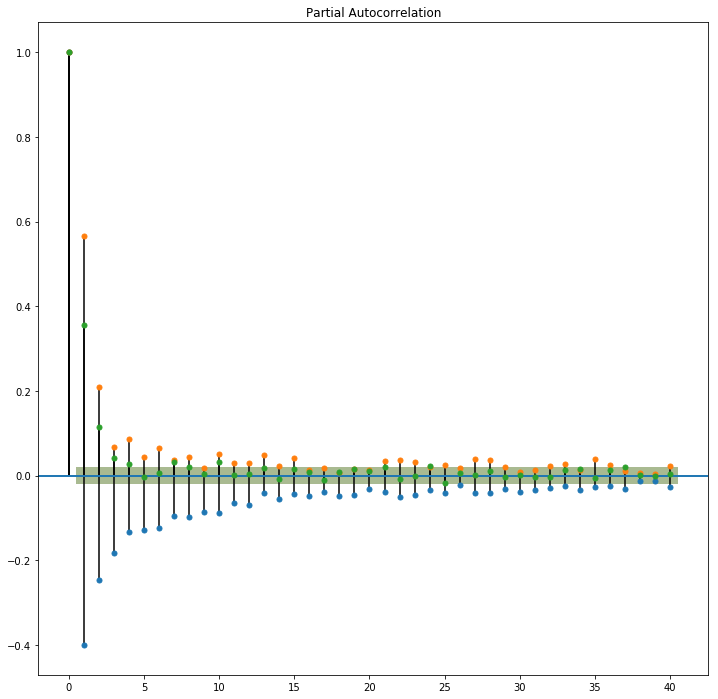

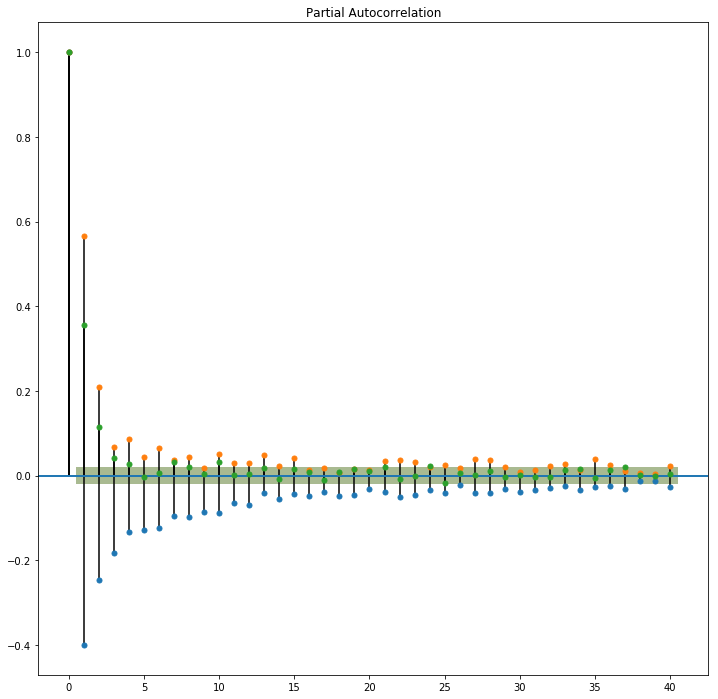

In [39]:
fig, ax2 = plt.subplots(figsize=(12, 12))
plot_pacf(df_sorted['Board Disposition'].diff().dropna(), ax=ax2)
plot_pacf(df_sorted['NYPDDisposition'], ax=ax2)
plot_pacf(df_sorted['Rank'], ax=ax2)

In [33]:
officer_counts = df['Full Name'].value_counts().reset_index()
officer_counts.columns = ['Officer', 'Number of complaints']
officer_counts.head(10)

,Officer,Number of complaints
0,Robert Currie,173
1,Michael Elliott,159
2,Robert Rodriguez,136
3,John Coghlan,127
4,Michael Murphy,124
5,George Whalen,113
6,Robert Martinez,110
7,Kevin Martin,109
8,Steven Deluca,109
9,Glen Halfhide,109


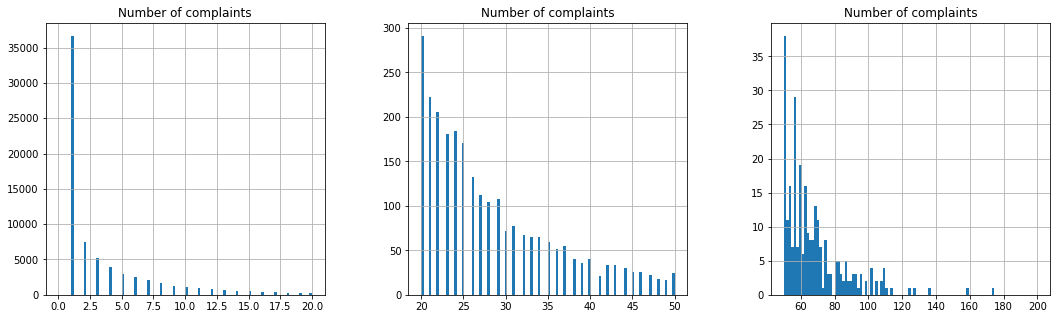

In [34]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

hist = officer_counts.hist(bins=100, range = [0, 20], ax=ax[0])
hist = officer_counts.hist(bins=100, range = [20, 50], ax=ax[1])
hist = officer_counts.hist(bins=100, range = [50, 200], ax=ax[2])



In [31]:
allegations = df['Allegation'].value_counts().reset_index()
allegations.columns = ['Allegation', 'Count of allegation']
allegations.head(10)

,Allegation,Count of allegation
0,Physical force,39164
1,nan,33683
2,Word,27518
3,Threat of arrest,13175
4,Premises entered and/or searched,11315
5,Curse,11287
6,Push/Shove,10425
7,Force,10218
8,Refusal to provide name/shield number,9576
9,Stop,8055


TypeError: must be real number, not str

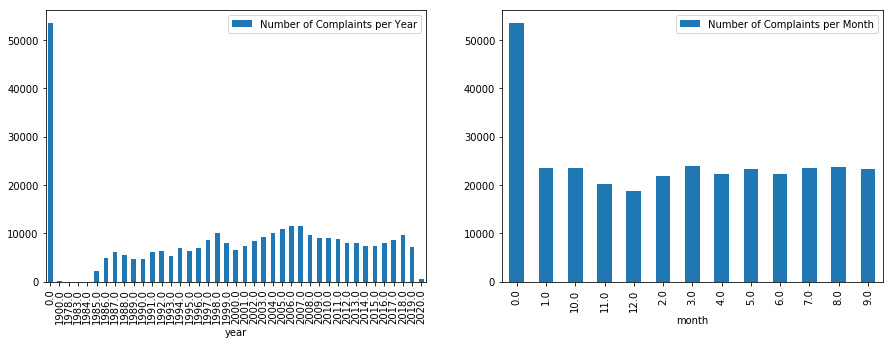

In [47]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

years_of_complaints = df.groupby(["year"]).size().reset_index(name="Number of Complaints per Year").sort_values(by=['year'], ascending = True)

years_of_complaints.plot(kind='bar',x='year',y='Number of Complaints per Year', ax=ax[0])

months_of_complaints = df.groupby(["month"]).size().reset_index(name="Number of Complaints per Month").sort_values(by=['month'], ascending = True)
months_of_complaints.plot(kind='bar',x='month',y='Number of Complaints per Month', ax=ax[1])

years = df['year'].unique()
years = [x for x in years if (math.isnan(x) == False)]
years.sort()

# Example use of Matrix Factorization

In [8]:
from sklearn import preprocessing

officers    = np.array(df['Full Name']).astype(str)
allegations = np.array(df['Allegation']).astype(str)

# Convert from officer names and allegation names to label encoding.
le1 = preprocessing.LabelEncoder()
le1.fit(officers)

le2 = preprocessing.LabelEncoder()
le2.fit(allegations)

xs = le1.transform(officers)
ys = le2.transform(allegations)

assert len(xs) == len(ys)

In [9]:
from sklearn.decomposition import TruncatedSVD, NMF
from scipy.sparse import csr_matrix

# Get counts of each officer/allegation interaction.
non_unique_edges = list(zip(xs, ys))

In [10]:
pd.Series(non_unique_edges)
unique_edges_with_counts = pd.Series(non_unique_edges).value_counts()
edges  = unique_edges_with_counts.index.values
counts = unique_edges_with_counts.values

u_xs, u_ys = zip(*edges)

# Construct sparse matrix data type.
X = csr_matrix((counts, (u_xs, u_ys)))

# Compute Non-negative Matrix Factorization.
n_components = 5
nmf = NMF(n_components=n_components, random_state=41)
nmf.fit(X)

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=5, random_state=41)

In [11]:
print(f'Top {n_components} components lead to reconstruction error (in Frobenius norm) of {nmf.reconstruction_err_}.')
print()

topK = 5
for i in range(nmf.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(nmf.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

Top 5 components lead to reconstruction error (in Frobenius norm) of 552.6400982883528.

Top allegations in component 1:
	Physical force
	Stop
	Search (of person)
	Question and/or stop
	Refusal to provide name/shield number

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Ethnic Slur
	Premises entered and/or searched

Top allegations in component 4:
	nan
	Push/Shove
	Premises entered and/or searched
	Rude Gesture
	Other - Force

Top allegations in component 5:
	Word
	Threat of arrest
	Refusal to provide name/shield number
	Premises entered and/or searched
	Search (of person)



In [12]:
# Compute truncated SVD (uses a randomized algorithm by default).
n_components = 5
svd = TruncatedSVD(n_components=n_components, random_state=41)
svd.fit(X)

# Look at the top principle components.
print(f'Top {n_components} components explain {svd.explained_variance_ratio_.sum()} of the variance.')
print(f'Breakdown: {svd.explained_variance_ratio_}\n')

Top 5 components explain 0.5481558793759286 of the variance.
Breakdown: [0.26892853 0.13312525 0.05333121 0.04382109 0.0489498 ]



# Capstat Expanded Dataset

In [15]:
file2 = open('capstat_expanded_dataset.csv', 'r')
df2 = pd.read_csv(file2)
df2['Full Name'] = df2['First Name'] + " " + df2['Last Name']
df2.head(10)


,Unnamed: 0,First Name,Last Name,Full Name,Current Rank,Associated shield #,Last known command,Current county,Started,All Ranks,All Salaries,Ceased,Previous shield
0,0,Hans,Francois,Hans Francois,Police Officer,25825.0,Special Operations Division,Kings,"December 8, 1997",[FY2000][Police Officer],"[FY2018][$85,292] [FY2017][$85,292] [FY2016][$...",NaN,NaN
1,1,Christopher,Boerke,Christopher Boerke,Detective Second Grade,NaN,NaN,New York,"February 28, 1994",[FY2014][Detective Second Grade] [FY2002][Dete...,"[FY2016][$100,044] [FY2015][$100,044] [FY2014]...",2015.0,NaN
2,2,Walter,Cacaj,Walter Cacaj,Sergeant,NaN,NaN,New York,"January 20, 1994",[FY2000][Sergeant],"[FY2016][$100,044] [FY2015][$100,044] [FY2013]...",2013.0,NaN
3,3,Santiago,Frances,Santiago Frances,Detective Second Grade,NaN,NaN,New York,"February 28, 1994",[FY2015][Detective Second Grade] [FY2006][Dete...,"[FY2016][$102,054] [FY2015][$101,044] [FY2014]...",2016.0,NaN
4,4,Elio,Chianetta,Elio Chianetta,Police Officer,NaN,NaN,Richmond,"January 7, 2015",[FY2015][Police Officer],"[FY2018][$54,394] [FY2017][$48,666] [FY2016][$...",NaN,NaN
5,5,Darrell,Chavers,Darrell Chavers,Detective First Grade,NaN,NaN,New York,"July 28, 1987",[FY2003][Detective First Grade] [FY2000][Detec...,"[FY2016][$114,837] [FY2015][$114,837] [FY2014]...",2014.0,NaN
6,6,Christopher,Battaglia,Christopher Battaglia,Police Officer,NaN,NaN,Queens,"July 9, 2013",[FY2014][Police Officer],"[FY2018][$63,125] [FY2017][$59,401] [FY2016][$...",NaN,NaN
7,7,Michael,Boliak,Michael Boliak,Detective First Grade,NaN,NaN,New York,"January 13, 1992",[FY2008][Detective First Grade] [FY2004][Detec...,"[FY2016][$115,985] [FY2015][$115,985] [FY2014]...",2015.0,NaN
8,8,Mehmet,Buyukdag,Mehmet Buyukdag,Police Officer,22169.0,NaN,New York,"July 1, 2002",[FY2003][Police Officer],"[FY2018][$85,292] [FY2017][$85,292] [FY2016][$...",NaN,NaN
9,9,Michael,Caputo,Michael Caputo,Sergeant,NaN,NaN,New York,"July 11, 2005",[FY2014][Sergeant],"[FY2017][$81,367] [FY2016][$81,367] [FY2015][$...",2014.0,NaN


In [16]:
df2_nameseries = df2['Full Name'].values.astype(str)
df_nameseries  = df['Full Name'].values.astype(str)

df_match = df.loc[df['Full Name'].isin(df2_nameseries)]
df2_match = df2.loc[df2['Full Name'].isin(df_nameseries)]
print(f'{len(df_match)} of the {len(df)} complaints matched to a police officer in the CapStat.NYC database.')
print(f'{len(df2_match)} of the {len(df2)} police officers have at least one complaint against them.')

49048 of the 323911 complaints matched to a police officer in the CapStat.NYC database.
11197 of the 11849 police officers have at least one complaint against them.


# CapStat.NYC Police Officer Database
Compiled from CapStat.NYC by Wendy Ho

https://github.com/wendyho/NYPD-Misconduct-Complaint-Database

In [13]:
file3 = open('officer_data.csv', 'r') 
df3 = pd.read_csv(file3)
df3['Full Name'] = df3['First Name'] + " " + df3['Last Name']
df3.head(10)

,Unnamed: 0,First Name,Last Name,Rank,Location,Full Name
0,0,Lori,Aanonsen,Detective Third Grade,New York,Lori Aanonsen
1,1,Walter,Aanonsen,Lieutenant,New York,Walter Aanonsen
2,2,Abdelhadi,Aanouz,Police Officer,Bronx,Abdelhadi Aanouz
3,3,Gary,Aaronson,Police Officer,Queens,Gary Aaronson
4,4,Jacob,Aaronson,Police Officer,New York,Jacob Aaronson
5,5,Robert,Aasheim,Detective Specialist,New York,Robert Aasheim
6,6,Thomas,Aasheim,Detective Second Grade,New York,Thomas Aasheim
7,7,Darsey,Abad,Detective First Grade,New York,Darsey Abad
8,8,Anthony,Abadia,Police Officer,Kings,Anthony Abadia
9,9,David,Abadia,Police Officer,Bronx,David Abadia


In [14]:
df3_nameseries = df3['Full Name'].values.astype(str)
df_nameseries  = df['Full Name'].values.astype(str)

df_match = df.loc[df['Full Name'].isin(df3_nameseries)]
df3_match = df3.loc[df3['Full Name'].isin(df_nameseries)]
print(f'{len(df_match)} of the {len(df)} complaints matched to a police officer in the CapStat.NYC database.')
print(f'{len(df3_match)} of the {len(df3)} police officers have at least one complaint against them.')

52061 of the 323911 complaints matched to a police officer in the CapStat.NYC database.
11693 of the 12450 police officers have at least one complaint against them.


In [15]:
df3['Rank'].value_counts()

Police Officer                   7940
Sergeant                         1579
Detective Third Grade            1068
Lieutenant                        642
Detective Second Grade            413
Detective Specialist              312
Detective First Grade             189
Captain                            95
Deputy Inspector                   54
Inspector                          49
Deputy Chief Inspector             22
Assistant Chief Inspector          15
Chief                               5
Assistant Deputy Commissioner       2
Assistant Commissioner              2
First Deputy Commissioner           1
Deputy Commissioner                 1
Commissioner                        1
Name: Rank, dtype: int64

In [16]:
df3['Location'].value_counts()

          New York    6520
          Kings       2206
          Queens      1846
          Bronx       1384
          Richmond     329
Name: Location, dtype: int64